# (04) AD: adj compare

**Motivation**: Compare saved adjacency matrices, visuzlie them. Possibly KMeans. <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Prepare

In [2]:
mice = Mice(Config(128, resolution=25))
mice.set_band(band_bo=(0.008,0.28))

ROI lookup not found, time to run organize_func() . . .

combine metadata not found, time to run cat_data() . . .

## Load

### Adj

In [3]:
adj = np.load(pjoin(tmp_dir, 'AD_adj.npy'), allow_pickle=True).item()
len(adj), 348 + 118 + 69 + 2 + 10

(547, 547)

### Node2id

In [4]:
n2i = np.load(pjoin(tmp_dir, 'AD_n2i.npy'), allow_pickle=True).item()
i2n = {i: n for n, i in n2i.items()}

n2l = {}
for n, i in n2i.items():
    info = mice.parcel.get(i)
    if info['acro'] == 'Isocortex':
        n2l[n] = f"{info['hemis']}-{info['region']}-{info['layer']}"
    else:
        n2l[n] = f"{info['hemis']}-{info['region']}"
mice.node_lookup['bold'] = n2l
mice.node_lookup['ca2'] = {
    n: lbl for n, lbl in n2l.items()
    if len(lbl.split('-')) == 3
}
bs = Base(mice, mode='ca2')

## Correlations

In [5]:
for g in ['WT', 'DKI']:
    for ses in [1, 2, 3]:
        key = f"sub-{g}_ses-{ses}"
        a = adj[key]

<matplotlib.image.AxesImage object at 0x7ff4b3df7dc0>

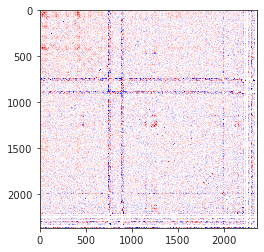

In [9]:
plt.imshow(a, vmin=-0.1, vmax=0.1, cmap='bwr')

<AxesSubplot:ylabel='Percent'>

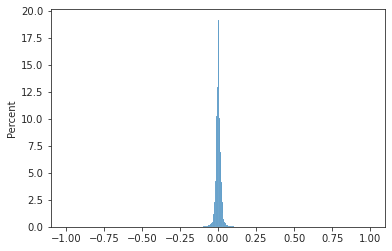

In [12]:
sns.histplot(a.ravel(), bins=np.linspace(-1, 1, 401), stat='percent')

<AxesSubplot:ylabel='Percent'>

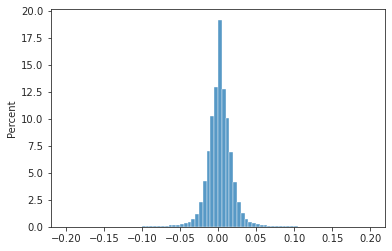

In [13]:
sns.histplot(a.ravel(), bins=np.linspace(-0.2, 0.2, 81), stat='percent')